In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('temperature_lostitem.csv')

In [12]:
df

,Unnamed: 0,temperature_moyenne,nb_lost_item
0,0,-9.3500,8
1,1,-8.0750,1
2,2,-8.0000,4
3,3,-7.9625,6
4,4,-7.8000,8
...,...,...,...
7721,7721,32.2750,5
7722,7722,32.3500,6
7723,7723,32.6125,4
7724,7724,33.1500,1


In [13]:
df.columns

Index(['Unnamed: 0', 'temperature_moyenne', 'nb_lost_item'], dtype='object')

In [16]:
df[['temperature_moyenne', 'nb_lost_item']]

,temperature_moyenne,nb_lost_item
0,-9.3500,8
1,-8.0750,1
2,-8.0000,4
3,-7.9625,6
4,-7.8000,8
...,...,...
7721,32.2750,5
7722,32.3500,6
7723,32.6125,4
7724,33.1500,1


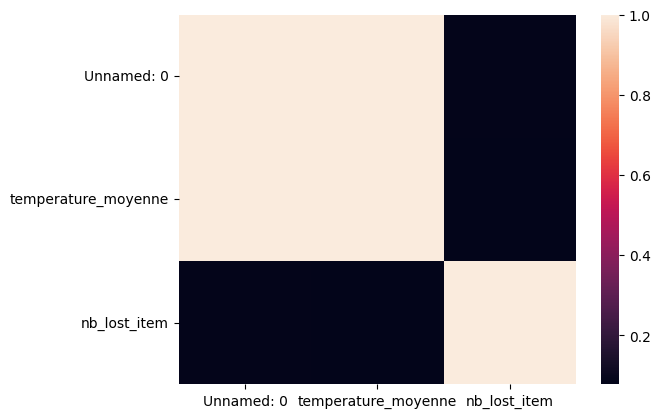

In [17]:
sns.heatmap(df.corr())
plt.show()

In [18]:
temp = df['temperature_moyenne']
lost_items = df['nb_lost_item']
corr = temp.corr(lost_items)
print(corr)

0.07759374681026789


pas de corollation entre lost_item et temperature

In [21]:
import sqlite3
import pandas as pd
cnx = sqlite3.connect('db.sqlite')
df = pd.read_sql_query("SELECT * FROM LostItem", cnx)
df['date'] = pd.to_datetime(df['date'])

In [23]:
dates = df['date'] 
months = dates.dt.month
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}
df['saisons'] = months.map(seasons)

In [69]:
df['annee'] = df['date'].dt.year

In [94]:
df['mois'] = df['date'].dt.month

In [70]:
df.columns

Index(['id', 'code_uic_gare_origine', 'date', 'type_objet', 'gare',
       'date_restitution', 'saisons', 'annee'],
      dtype='object')

In [71]:
df

,id,code_uic_gare_origine,date,type_objet,gare,date_restitution,saisons,annee
0,46aa8bd680d64ff47521f2f9565b3af08101f777,0087271007,2016-01-31 21:49:49+00:00,Pièces d'identités et papiers personnels,Paris Gare du Nord,None,Winter,2016
1,1429134dd10f77c7c671483321efee8b13b0a566,0087271007,2016-01-31 21:30:04+00:00,"Appareils électroniques, informatiques, appare...",Paris Gare du Nord,None,Winter,2016
2,924a6fe7511fe141cb270665f2047ecdd2992efa,0087773002,2016-01-31 21:29:14+00:00,"Bagagerie: sacs, valises, cartables",Montpellier Saint-Roch,None,Winter,2016
3,4232bb601ebfe57bff6005540ae6bf34254464db,0087773002,2016-01-31 21:27:25+00:00,Divers,Montpellier Saint-Roch,None,Winter,2016
4,92bb57fd33d69e655f519b3ccc321f1f62583407,0087271007,2016-01-31 21:23:22+00:00,"Bagagerie: sacs, valises, cartables",Paris Gare du Nord,2016-02-05T17:36:20+00:00,Winter,2016
...,...,...,...,...,...,...,...,...
413249,8b42bc917b8b5c638bc28d521a575e64954700b1,0087683268,2021-12-01 07:24:00+00:00,Articles médicaux,Laroche - Migennes,None,Winter,2021
413250,9a2c4bc35885a627d404c6091f59d05bddafc8c8,0087212027,2021-12-01 07:11:54+00:00,"Bagagerie: sacs, valises, cartables",Strasbourg,None,Winter,2021
413251,78590bbae89c18bbb148f8c67703e288691f32ae,0087411017,2021-12-01 05:44:51+00:00,"Clés, porte-clés, badge magnétique",Rouen Rive Droite,2021-12-04T10:51:54+00:00,Winter,2021
413252,0d523cedaf517d472690f8056a650ef4ba48a8a0,0087723197,2021-12-01 05:25:12+00:00,"Appareils électroniques, informatiques, appare...",Lyon Part Dieu,None,Winter,2021


In [72]:
df_saison = df.groupby(['annee','saisons']).agg({'type_objet':'count'})

In [75]:
df_saison=df_saison.reset_index()

In [76]:
df_saison

,index,annee,saisons,type_objet
0,0,2016,Fall,24339
1,1,2016,Spring,23170
2,2,2016,Summer,25634
3,3,2016,Winter,20320
4,4,2017,Fall,4185
5,5,2017,Spring,4956
6,6,2017,Winter,22809
7,7,2018,Fall,24347
8,8,2018,Spring,18944
9,9,2018,Summer,24338


In [77]:
df_saison.describe()

,index,annee,type_objet
count,23.00000,23.000000,23.000000
mean,11.00000,2018.565217,17967.565217
std,6.78233,1.753596,6751.702848
min,0.00000,2016.000000,4185.000000
25%,5.50000,2017.000000,14178.000000
50%,11.00000,2019.000000,18944.000000
75%,16.50000,2020.000000,23116.500000
max,22.00000,2021.000000,25634.000000


In [78]:
df_medians = df_saison.groupby('saisons').agg({'type_objet':'median'})
df_medians

,type_objet
saisons,
Fall,20259.5
Spring,15286.0
Summer,24338.0
Winter,19021.0


In [82]:
df_medians = df_medians.reset_index()

In [85]:
df_medians.columns

Index(['saisons', 'type_objet'], dtype='object')

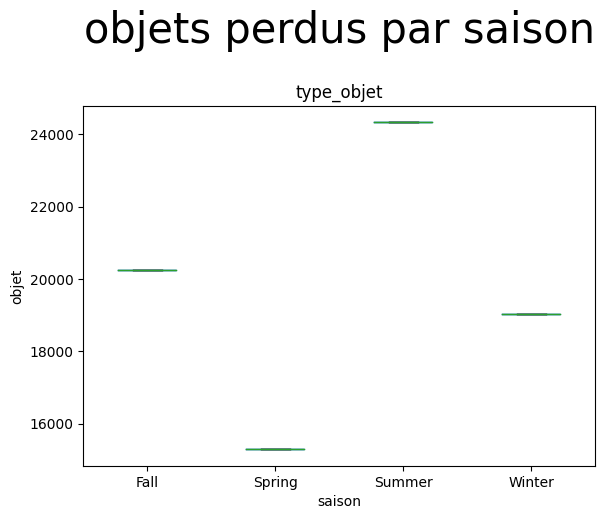

In [134]:
df_medians.boxplot(column='type_objet', by='saisons', showfliers=False, grid=False)
plt.suptitle('objets perdus par saison', size=30, y=1.1)
plt.xlabel('saison')
plt.ylabel('objet')
plt.savefig('objets perdus par saison')
plt.show()


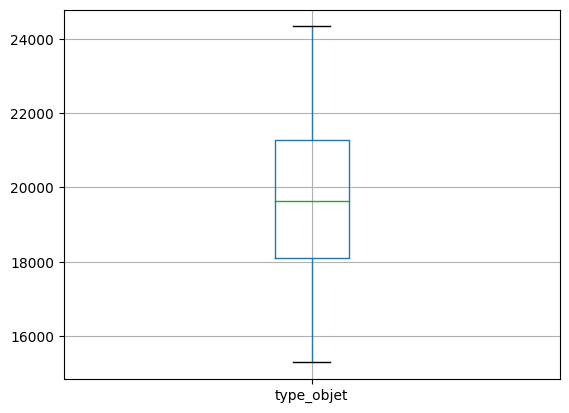

In [88]:
df_medians.boxplot()
plt.show()

In [135]:
df_medians.columns
df_medians

,saisons,type_objet
0,Fall,20259.5
1,Spring,15286.0
2,Summer,24338.0
3,Winter,19021.0


/var/folders/cq/rtjptvh55mx98pdv787t928w0000gp/T/ipykernel_25450/1588726863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_medians.corr())


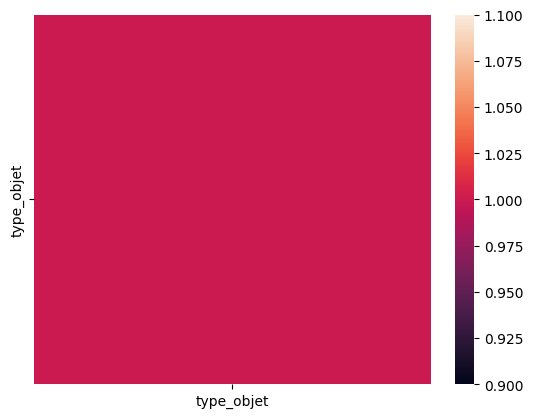

In [89]:
sns.heatmap(df_medians.corr())
plt.show()

In [125]:
df_medians = df_medians.pivot_table(index='saisons', values='type_objet')
df_medians = df_medians.reset_index()

In [126]:
df_medians.columns



Index(['saisons', 'type_objet'], dtype='object')

In [131]:
df_medians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   saisons     4 non-null      object 
 1   type_objet  4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [127]:
temp = df_medians['saisons']
lost_items = df_medians['type_objet']
corr = temp.corr(lost_items)
print(corr)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [112]:
df_mois = df.groupby('mois').agg({'type_objet':'count'})
df_mois = df_mois.reset_index()
df_mois

,mois,type_objet
0,1,36962
1,2,38999
2,3,34901
3,4,24244
4,5,27055
5,6,31224
6,7,39665
7,8,37507
8,9,35672
9,10,36279


In [105]:
pivot = df_mois.pivot_table(index='mois', values='type_objet')

In [109]:
pivot = pivot.reset_index()


In [113]:
pivot

,mois,type_objet
0,1,36962
1,2,38999
2,3,34901
3,4,24244
4,5,27055
5,6,31224
6,7,39665
7,8,37507
8,9,35672
9,10,36279


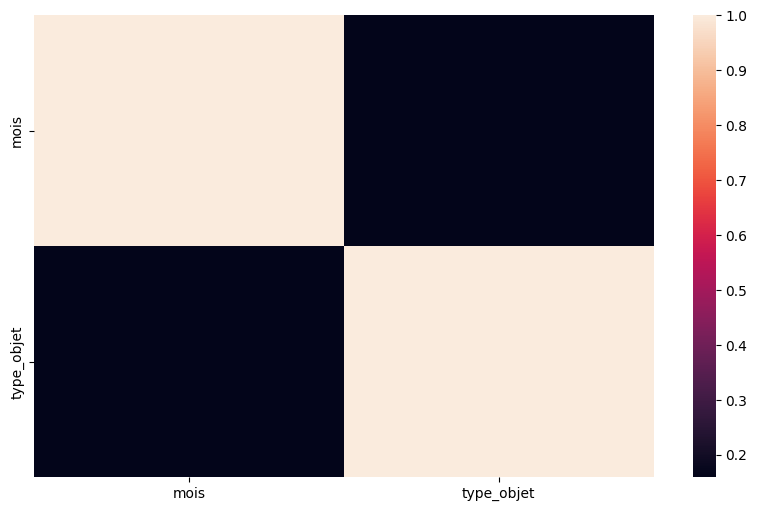

In [110]:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot.corr())
plt.show()

In [132]:
df_mois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   mois        12 non-null     int64
 1   type_objet  12 non-null     int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [114]:
temp = df_mois['mois']
lost_items = df_mois['type_objet']
corr = temp.corr(lost_items)
print(corr)

0.1590173008109846


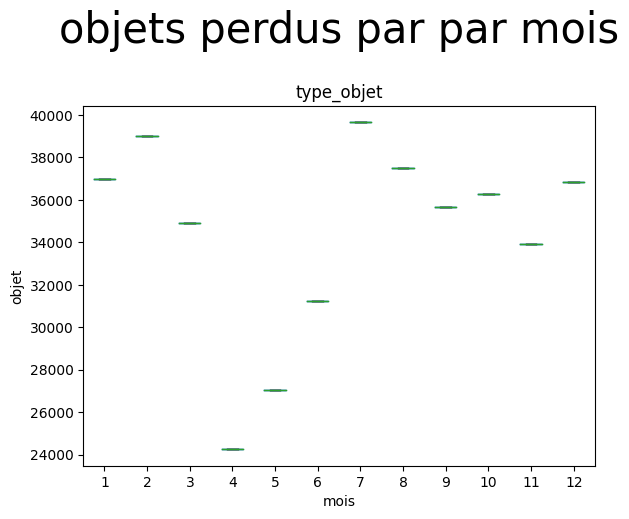

In [136]:
df_mois.boxplot(column='type_objet', by='mois', showfliers=False, grid=False)
plt.suptitle('objets perdus par par mois', size=30, y=1.1)
plt.xlabel('mois')
plt.ylabel('objet')
plt.savefig('objets perdus par mois')
plt.show()